**Chapter_2e**  
**ATMOS 5040: Environmental Programming and Statistics**  
**John Horel and Derek Mallia**

If you didn't do before: 

cp ~u0035056/atmos_5340_2022/chapter2/* . # where you are in your chapter2 directory in your 5340 subdirectory cp ~u0035056atmos5340/data/* . # where you are in your data directory

# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`



`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [15]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

# Chapter 2e

get time series of wind speed and direction from WBB for May 2020 in csv format

documentation on how that was done from Synoptic api services
http://synopticdata.com

https://api.synopticdata.com/v2/stations/timeseries?&token=52c25c7d57f341d489c45720202b313f&start=202005010600&end=202006010559&obtimezone=local&output=csv&stid=wbb&vars=wind_speed,wind_direction,wind_gust

returns a csv file with 8 header lines that are skipped 
4 columns: station_id, date(YYYY-MM-DDTHH:MM:SS-0600), wind speed (m/s) direction, wind gust(m/s)

Another decent resource on pandas
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [16]:
#need to parse the date string
#this will be really useful later for just about any time you mess with datestrings
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z')
#there are times with no actual values (direction blank and wind speed and gust 0)
#those will get changed to NaN by the read_csv function
headers = ['STID','Date', 'Speed', 'Direction', 'Gust']
dtypes = {'STID': 'str','Date': 'str', 'Speed': 'float', 'Direction': 'float', 'Gust': 'float'}

df = pd.read_csv('../data/wbb_may_2020.txt', parse_dates=['Date'], date_parser=dateparse, \
                 names=headers,dtype = dtypes,na_filter=True,skiprows=8)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(df)
# times are local (MDT)

      STID                      Date  Speed  Direction  Gust
0      WBB 2020-05-01 00:00:00-06:00    2.1      254.8   2.6
1      WBB 2020-05-01 00:01:00-06:00    2.6      258.5   3.2
2      WBB 2020-05-01 00:02:00-06:00    2.5      258.6   3.2
3      WBB 2020-05-01 00:03:00-06:00    2.1      253.7   2.9
4      WBB 2020-05-01 00:04:00-06:00    0.6      280.5   1.3
...    ...                       ...    ...        ...   ...
44635  WBB 2020-05-31 23:55:00-06:00    5.3      152.0   6.4
44636  WBB 2020-05-31 23:56:00-06:00    4.1      146.9   5.1
44637  WBB 2020-05-31 23:57:00-06:00    3.6      164.6   6.7
44638  WBB 2020-05-31 23:58:00-06:00    5.2      159.3   7.2
44639  WBB 2020-05-31 23:59:00-06:00    6.2      155.7   8.5

[44640 rows x 5 columns]


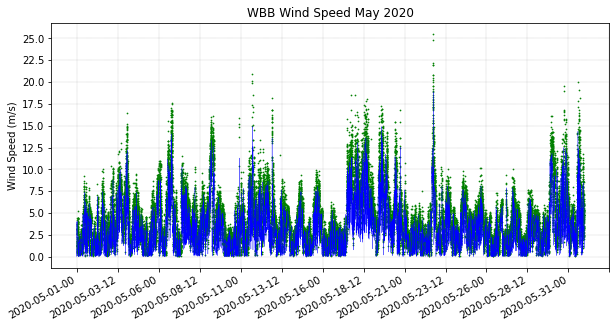

In [32]:
#plot time series of wind speed during May 2020
#handling time can be awkward. Here  creating a numpy array of the dates from the time objects in the dataframe
DATES = np.array([datetime.strftime(i, '%Y-%m-%d-%H') for i in df['Date']])
fig,ax = plt.subplots(1,1,figsize=(10,5))
plt.plot(DATES, df['Speed'],color='blue',linewidth=.3)
plt.scatter(DATES, df['Gust'], color = 'green',marker='.',s=2)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(16)) #set the number of x axis ticks. (without this it will plot every tick mark)
plt.gcf().autofmt_xdate() #get a nice date format for the x axis (makes it look neat)
ax.set(ylabel='Wind Speed (m/s)')
ax.set_yticks(np.arange(0,27.5,step=2.5))
ax.grid(linestyle='--', color='grey', linewidth=.2)
ax.set_title('WBB Wind Speed May 2020')

plt.savefig('figure_2.12.png')

In [18]:
#some basic info + output precentiles
basic_vals = df.describe(percentiles=[.01,.10,.25,.33,.50,.66,.75,.90,.99])
print(basic_vals)

        Speed  Direction    Gust
count 44640.0    44198.0 44640.0
mean      3.0      182.9     4.3
std       2.2      114.1     3.0
min       0.0        0.0     0.0
1%        0.0        2.6     0.1
10%       0.7       34.5     1.2
25%       1.4       67.8     2.1
33%       1.8       98.2     2.5
50%       2.6      181.5     3.6
66%       3.6      265.5     4.9
75%       4.2      294.0     5.8
90%       6.0      330.9     8.4
99%      10.0      356.7    13.7
max      18.9      360.0    25.5


In [19]:
#note that there are "missing" blank wind directions and those values have 0 wind speed and gust
#so the counts of direction are lower than for speed. it is critical to remove those rows
#remove rows with a NaN in any column
df=df.dropna()
basic_vals = df.describe(percentiles=[.01,.10,.25,.33,.50,.66,.75,.90,.99])
print(basic_vals)
#now the number of rows is the same

        Speed  Direction    Gust
count 44198.0    44198.0 44198.0
mean      3.1      182.9     4.3
std       2.2      114.1     3.0
min       0.0        0.0     0.1
1%        0.1        2.6     0.3
10%       0.7       34.5     1.2
25%       1.4       67.8     2.1
33%       1.8       98.2     2.5
50%       2.6      181.5     3.6
66%       3.6      265.5     4.9
75%       4.2      294.0     5.8
90%       6.0      330.9     8.4
99%      10.0      356.7    13.7
max      18.9      360.0    25.5


In [20]:
#What were the top 10 peak wind speed values and when?
df1=df.sort_values(by='Speed', ascending=False)   
print(df1.iloc[:10:,])
#Times are local (MDT)

      STID                      Date  Speed  Direction  Gust
31322  WBB 2020-05-22 18:02:00-06:00   18.9      307.4  25.5
31329  WBB 2020-05-22 18:09:00-06:00   16.8      335.9  22.0
31334  WBB 2020-05-22 18:14:00-06:00   16.3      328.9  20.8
31323  WBB 2020-05-22 18:03:00-06:00   15.5      321.9  24.8
31337  WBB 2020-05-22 18:17:00-06:00   15.0      332.3  20.8
31333  WBB 2020-05-22 18:13:00-06:00   15.0      329.1  22.1
15466  WBB 2020-05-11 17:46:00-06:00   14.9      288.1  20.1
26814  WBB 2020-05-19 14:54:00-06:00   14.9        2.2  17.2
31330  WBB 2020-05-22 18:10:00-06:00   14.9      321.6  19.0
31321  WBB 2020-05-22 18:01:00-06:00   14.8      305.8  20.0


In [21]:
#What were the top 10 peak wind gusts values and when?
df1=df.sort_values(by='Gust', ascending=False)   
print(df1.iloc[:10:,])

      STID                      Date  Speed  Direction  Gust
31322  WBB 2020-05-22 18:02:00-06:00   18.9      307.4  25.5
31323  WBB 2020-05-22 18:03:00-06:00   15.5      321.9  24.8
31333  WBB 2020-05-22 18:13:00-06:00   15.0      329.1  22.1
31329  WBB 2020-05-22 18:09:00-06:00   16.8      335.9  22.0
31332  WBB 2020-05-22 18:12:00-06:00   13.4      335.5  22.0
15463  WBB 2020-05-11 17:43:00-06:00   11.0      264.7  21.0
31337  WBB 2020-05-22 18:17:00-06:00   15.0      332.3  20.8
31334  WBB 2020-05-22 18:14:00-06:00   16.3      328.9  20.8
31347  WBB 2020-05-22 18:27:00-06:00   14.3      327.9  20.5
31328  WBB 2020-05-22 18:08:00-06:00   12.4      336.2  20.2


# Figure 2.13 Statistics on Wind Speed and Direction


44198


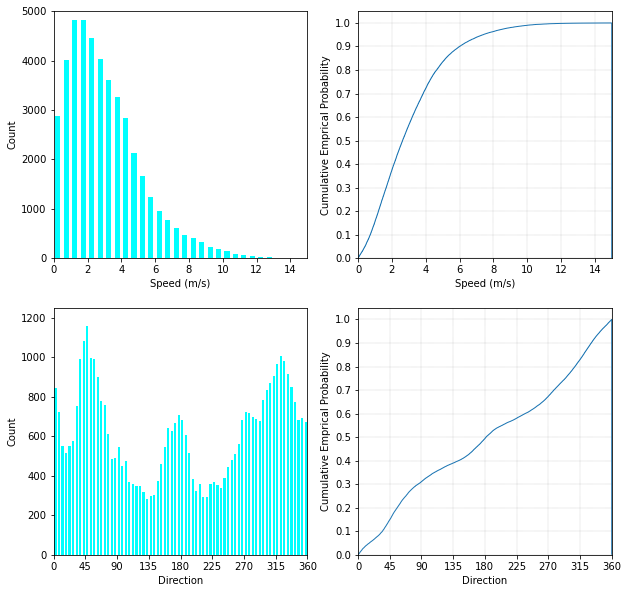

In [22]:
#histograms and empirical CDFs of speed, direction 
fig,ax = plt.subplots(2,2,figsize=(10,10))
x1 = np.arange(0.,15.5,.5)
hist_val1,bins1 = np.histogram(df['Speed'].values,bins=x1,range=(x1.min(),x1.max()))
width1 = 0.6 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2
ax1 = ax[0,0]
ax1.bar(center1,hist_val1,align='center',width=width1,color='cyan')
ax1.set(xlim=(0,15),ylim=(0,5000))
ax1.set(xlabel="Speed (m/s)",ylabel='Count')

x2 = np.arange(0,365,5)
hist_val2,bins2 = np.histogram(df['Direction'].values,bins=x2,range=(x2.min(),x2.max()))
width2 = 0.6 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2
ax2 = ax[1,0]
ax2.bar(center2,hist_val2,align='center',width=width2,color='cyan')
ax2.set(xlim=(0,360),ylim=(0,1250))
ax2.set_xticks(np.arange(0,365,step=45))
ax2.set(xlabel="Direction",ylabel='Count')


#get total number of values
shape = df.shape
n_bins = shape[0]
print(n_bins)
ax3 = ax[0,1]
n, bins, patches = ax3.hist(df['Speed'].values, n_bins, density='True', histtype='step', \
                           cumulative=True, label='Empirical', range=(x1.min(),x1.max()))

ax3.set(xlabel="Speed (m/s)",ylabel='Cumulative Emprical Probability')
ax3.set(xlim=(x1.min(),x1.max()))
ax3.set_xticks(np.arange(0,16,step=2))
ax3.set_yticks(np.arange(0, 1.1, step=0.10))
ax3.grid(linestyle='--', color='grey', linewidth=.2)

ax4 = ax[1,1]
n, bins, patches = ax4.hist(df['Direction'].values, n_bins, density='True', histtype='step', \
                           cumulative=True, label='Empirical', range=(x2.min(),x2.max()))

ax4.set(xlabel="Direction",ylabel='Cumulative Emprical Probability')
ax4.set(xlim=(x2.min(),x2.max()))
ax4.set_xticks(np.arange(0,365,step=45))
ax4.set_yticks(np.arange(0, 1.1, step=0.10))
ax4.grid(linestyle='--', color='grey', linewidth=.2)
plt.savefig('figure_2.13.png')

In [23]:
#convert spd,dir to u,v. python- 0 angle is relative to x axis and then counterclockwise
pid = np.pi/180.
u = df['Speed'] * np.sin(pid*(df['Direction'] - 180));
v = df['Speed'] * np.cos(pid*(df['Direction'] - 180));
#add to dataframe the zonal and meridional values
df['u']= u.values
df['v']= v.values
#print(u)
#note that u and v computed for times when no missing data
basic_vals = df.describe(percentiles=[.01,.10,.25,.33,.50,.66,.75,.90,.99])
print(basic_vals)

        Speed  Direction    Gust       u       v
count 44198.0    44198.0 44198.0 44198.0 44198.0
mean      3.1      182.9     4.3    -0.0    -0.5
std       2.2      114.1     3.0     2.4     2.8
min       0.0        0.0     0.1   -12.7   -15.4
1%        0.1        2.6     0.3    -7.3    -7.9
10%       0.7       34.5     1.2    -2.9    -3.6
25%       1.4       67.8     2.1    -1.5    -2.1
33%       1.8       98.2     2.5    -0.9    -1.6
50%       2.6      181.5     3.6     0.0    -0.6
66%       3.6      265.5     4.9     0.8     0.1
75%       4.2      294.0     5.8     1.4     0.6
90%       6.0      330.9     8.4     2.9     2.9
99%      10.0      356.7    13.7     5.4     7.9
max      18.9      360.0    25.5    15.0    13.5


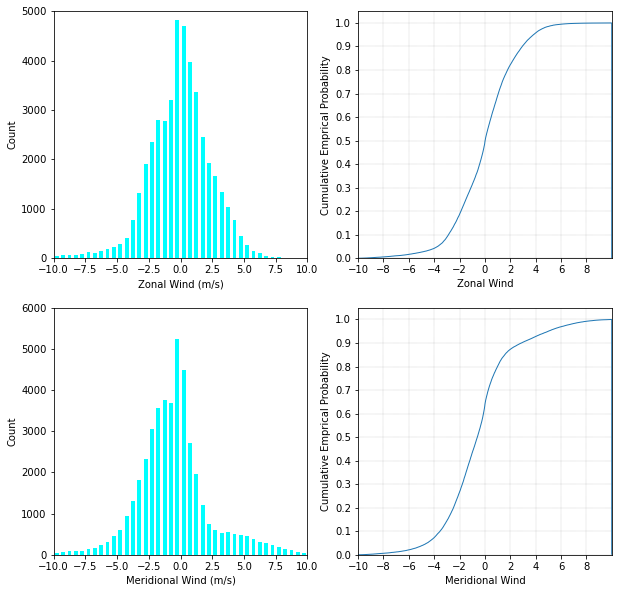

In [24]:
#plotting zonal and meridional wind statistics
fig,ax = plt.subplots(2,2,figsize=(10,10))
x1 = np.arange(-10.,10.5,.5)
hist_val1,bins1 = np.histogram(u.values,bins=x1,range=(x1.min(),x1.max()))
width1 = 0.6 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2
ax1 = ax[0,0]
ax1.bar(center1,hist_val1,align='center',width=width1,color='cyan')
ax1.set(xlim=(-10,10),ylim=(0,5000))
ax1.set(xlabel="Zonal Wind (m/s)",ylabel='Count')

x2 = np.arange(-10,10.5,.5)
hist_val2,bins2 = np.histogram(v.values,bins=x2,range=(x2.min(),x2.max()))
width2 = 0.6 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2
ax2 = ax[1,0]
ax2.bar(center2,hist_val2,align='center',width=width2,color='cyan')
ax2.set(xlim=(-10,10),ylim=(0,6000))
ax2.set(xlabel="Meridional Wind (m/s)",ylabel='Count')

ax3 = ax[0,1]
n, bins, patches = ax3.hist(u.values, n_bins, density='True', histtype='step', \
                           cumulative=True, label='Empirical', range=(x1.min(),x1.max()))

ax3.set(xlabel="Zonal Wind",ylabel='Cumulative Emprical Probability')
ax3.set(xlim=(x1.min(),x1.max()))
ax3.set_xticks(np.arange(-10,10,step=2))
ax3.set_yticks(np.arange(0, 1.1, step=0.10))
ax3.grid(linestyle='--', color='grey', linewidth=.2)


ax4 = ax[1,1]
n, bins, patches = ax4.hist(v.values, n_bins, density='True', histtype='step', \
                           cumulative=True, label='Empirical', range=(x2.min(),x2.max()))

ax4.set(xlabel="Meridional Wind",ylabel='Cumulative Emprical Probability')
ax4.set(xlim=(x2.min(),x2.max()))
ax4.set_xticks(np.arange(-10,10,step=2))
ax4.set_yticks(np.arange(0, 1.1, step=0.10))
ax4.grid(linestyle='--', color='grey', linewidth=.2)
plt.savefig('figure_2.14.png')

In [25]:
#some other statistics
#switch Dataframe to array
winda = df[['Speed','Direction','Gust','u','v']].values

#get list of variables
winda_var = list(df)
print(winda_var)

#define an array for the rounded values
winda_r = np.empty_like(winda)
#round the data to be in bins before computing the mode
#match the bins used for the histograms
bin_int = (0.5,5,0.5,0.5,0.5)
for v in range(0,5):
    winda_r[:,v]= np.around((winda[:,v]-bin_int[v]/2.)/bin_int[v], decimals=0)*bin_int[v]
winda_modes_r = stats.mode(winda_r,axis=0)
#note how array is setup
print(np.shape(winda_modes_r))
for v in range(0,5):
    print("%s mode:%.2f count: %d" % (winda_var[v+2], winda_modes_r[0][0][v],winda_modes_r[1][0][v]))

# unbiased estimate of pop standard deviation and variance
std0 = np.std(winda,ddof=1,axis=0)
var0 = np.var(winda,ddof=1,axis=0)

# sample standard deviation and variance
std1 = np.std(winda,axis=0)
var1 = np.var(winda,axis=0)

for v in range(0,5):
    print("\n %s Pop Est std: %.2f Pop Est var: %.2f" % (winda_var[v+2],std0[v],var0[v]))
    print("%s Sample std: %.2f Sample var: %.2f" % (winda_var[v+2],std1[v],var1[v]))

#skewness
skew = stats.skew(winda,axis=0)
for v in range(0,5):
    print("\n %s Skewness: %.2f" % (winda_var[v+2],skew[v]))



['STID', 'Date', 'Speed', 'Direction', 'Gust', 'u', 'v']
(2, 1, 5)
Speed mode:1.00 count: 4891
Direction mode:45.00 count: 1158
Gust mode:2.00 count: 4003
u mode:-0.50 count: 4817
v mode:-0.50 count: 5245

 Speed Pop Est std: 2.19 Pop Est var: 4.78
Speed Sample std: 2.19 Sample var: 4.78

 Direction Pop Est std: 114.09 Pop Est var: 13015.49
Direction Sample std: 114.08 Sample var: 13015.19

 Gust Pop Est std: 2.99 Pop Est var: 8.93
Gust Sample std: 2.99 Sample var: 8.93

 u Pop Est std: 2.41 Pop Est var: 5.81
u Sample std: 2.41 Sample var: 5.81

 v Pop Est std: 2.85 Pop Est var: 8.10
v Sample std: 2.85 Sample var: 8.10

 Speed Skewness: 1.19

 Direction Skewness: -0.04

 Gust Skewness: 1.24

 u Skewness: -0.33

 v Skewness: 0.42


# Wind Rose

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a

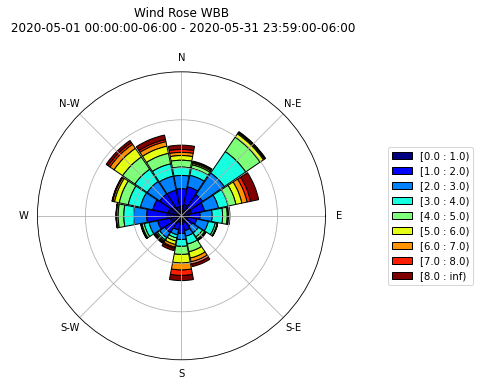

In [33]:
# use code created by Brian Blaylock that was adapted from other open source windrose code
# need to copy from ~u0035056/atmos_5340_2022/chapter_2/*.py to your directory 
from windrose import WindroseAxes

#get first and last dates for label
firsttime = df.Date.iloc[0]
lasttime = df.Date.iloc[-1]
#print(firsttime,lasttime)


fig = plt.figure(figsize=(5, 10), facecolor='w', edgecolor='w')
rect = [0.1, 0.1, 0.8, 0.8]
#the critical part to get polar coordinate
ax = WindroseAxes(fig, rect)
fig.add_axes(ax)

#wind direction is "x" and wind speed is "y"
ax.bar(winda[:,1], winda[:,0],
           bins=[0, 1, 2, 3, 4, 5, 6, 7, 8],
           nsector=16,
           normed=True,
           opening=.95,
           edgecolor='k')
#the above causes some warning diagnostics that I will ignore!
l = ax.legend()
plt.setp(l.get_texts())
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), prop={'size':10})
plt.title("Wind Rose WBB\n %s - %s\n" % (firsttime,lasttime))
plt.grid(True)
plt.yticks(np.arange(0, 105, 5))
#ax.set_yticklabels(['', '5%', '10%', '15%', '20%', '25%', '30%', '', '40%'])
ax.set_rmax(15)
plt.savefig("figure_2.15.png")

# Resultant vs Mean Wind

In [27]:
#one of the nice features of pandas. group in this case by time of day
#compute the means for each hour
diurnal_wind=df.groupby([df["Date"].dt.hour]).mean()
print(diurnal_wind)
ds=diurnal_wind['Speed'].values
du=diurnal_wind['u'].values
dv=diurnal_wind['v'].values
#compute resultant wind speed for each hour from the zonal and meridional components
ressp = np.sqrt(du*du+dv*dv)
for hr in range(0,24):
    print("%d mean: %.1f resultant: %.1f" % (hr,ds[hr],ressp[hr]))

      Speed  Direction  Gust    u    v
Date                                  
0       2.9      120.6   3.9 -1.3 -0.8
1       2.8      130.3   3.8 -1.2 -0.6
2       2.7      130.5   3.7 -1.1 -0.4
3       2.6      133.2   3.6 -1.2 -0.4
4       2.6      152.7   3.5 -1.2 -0.1
5       2.5      146.4   3.4 -1.2 -0.3
6       2.0      156.3   2.8 -0.8 -0.2
7       1.8      159.6   2.5 -0.5 -0.3
8       2.0      185.9   2.8 -0.4  0.2
9       2.1      220.8   3.1  0.4  0.3
10      2.6      233.5   3.9  0.9  0.3
11      2.8      235.0   4.3  1.2  0.5
12      3.2      233.0   4.9  1.4  0.5
13      3.5      242.5   5.3  1.6  0.3
14      3.9      241.6   5.7  1.5 -0.0
15      4.0      250.2   5.9  1.6 -0.6
16      4.1      245.9   5.9  1.5 -1.1
17      4.1      244.9   5.8  1.6 -1.1
18      4.1      248.8   5.7  1.4 -1.9
19      3.6      215.8   4.9  0.7 -1.6
20      3.0      137.6   4.0 -0.8 -1.3
21      3.6       97.7   4.6 -1.9 -1.5
22      3.8      100.4   4.9 -1.9 -1.6
23      3.4      119.9   

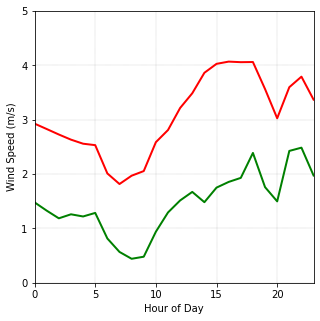

In [28]:
#plot mean wind speed vs resultant wind speed
fig15,ax = plt.subplots(1,1,figsize=(5,5),facecolor='w', edgecolor='w')
xd = np.arange(0,24)
ax.plot(xd,ds,color='red',linewidth=2);
ax.plot(xd,ressp,color='green',linewidth=2);
ax.set(xlim=(0,23),ylim=(0,5))
ax.set(xlabel="Hour of Day",ylabel='Wind Speed (m/s)')
ax.grid(linestyle='--', color='grey', linewidth=.2)
plt.savefig('figure_2.16.png')